###  Recommendation System for Netflix Prize Dataset using SVD

## -Prerak Pandya

In [41]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [42]:
df = pd.read_csv(r"C:\Users\Prerak\Desktop\combined_data_1.txt",header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [43]:
df
#import File

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [44]:
df.dtypes
#check data type

Cust_Id     object
Rating     float64
dtype: object

In [45]:
df.shape
#check shape of the data

(24058263, 2)

In [46]:
#check the null values
df.isnull().sum()
#Here 4499 are null values

Cust_Id       0
Rating     4499
dtype: int64

In [47]:
df['Rating'].unique()
# WE have 5 type odf rating

array([nan,  3.,  5.,  4.,  2.,  1.])

In [48]:
p = df.groupby('Rating')['Rating'].agg(['count'])
p
#here we see rating accoding total movies

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [49]:
#check Total unique customers 
df['Cust_Id'].nunique()

475257

In [50]:
# get movie count by counting nan values

movie_count = df.isnull().sum()[1]

movie_count
##4499 total number of movies present in dataset

4499

In [51]:
# get customer count
cust_count = df['Cust_Id'].nunique()-movie_count

cust_count

470758

In [52]:
# get rating count

rating_count = df['Cust_Id'].count() - movie_count

rating_count

24053764

## To plot the distribution of the ratings in as a bar plot

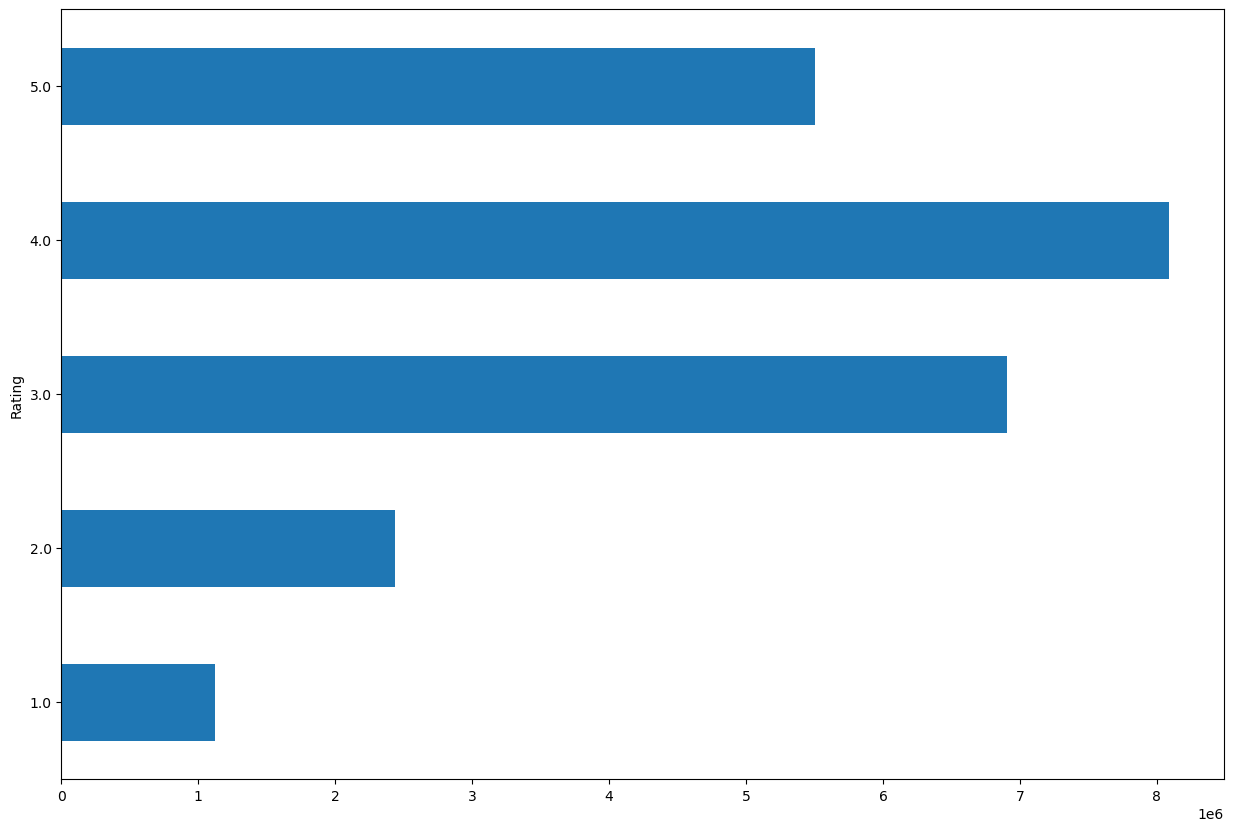

In [53]:
R = p.plot(kind = 'barh', legend = False, figsize = (15,10))

In [54]:
#add another column that will have movie id
df_nan = pd.DataFrame(pd.isnull(df.Rating))

In [55]:
df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [56]:
df_nan = df_nan[df_nan['Rating']==True]

In [57]:
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [58]:
#reset the index
df_nan = df_nan.reset_index()

In [59]:
movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

In [60]:
df = df[pd.notnull(df['Rating'])]#movies count so nan
df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] =df['Cust_Id'].astype(int)
print('-Dataset examples-')
df.head()

C:\Users\Prerak\AppData\Local\Temp\ipykernel_9196\325787035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Movie_Id'] = movie_np.astype(int)


-Dataset examples-


C:\Users\Prerak\AppData\Local\Temp\ipykernel_9196\325787035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cust_Id'] =df['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


### Set beanchmark

In [61]:
f = ['mean','count']

In [62]:
dataset_movie_summary = df.groupby('Movie_Id')['Rating'].agg(f)

In [63]:
round(dataset_movie_summary.quantile(0.7))

mean        4.0
count    1799.0
Name: 0.7, dtype: float64

In [64]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)


In [65]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

In [66]:
print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1799.0


In [67]:
#same we can apply in customer id
dataset_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
#                                           6                       <  5
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 52.0


In [68]:
df = df[~df['Movie_Id'].isin(drop_movie_list)]
#in dataset --->in all movie ids------>if the whic ever  movies we put under drop list are present or not---
#if present drop /remove them
df = df[~df['Cust_Id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(df.shape))

After Trim Shape: (17337458, 3)


In [69]:
df.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [70]:
#Import movie_name and year
df1 = pd.read_csv(r"C:\Users\Prerak\Desktop\Copy of movie_titles.csv",encoding='ISO-8859-1',header=None,usecols=[0,1,2],names=['Movie_id','year','name'])

In [71]:
df1

,Movie_id,year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [72]:
conda install -c conda-forge scikit-surprise


Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... done

# All requested packages already installed.






==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0




In [73]:
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [74]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']],reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8570  0.8576  0.8574  0.8573  0.0002  
MAE (testset)     0.6660  0.6663  0.6665  0.6663  0.0002  
Fit time          105.12  115.87  107.25  109.41  4.65    
Test time         51.52   66.37   77.53   65.14   10.65   


{'test_rmse': array([0.85698518, 0.85756667, 0.85744113]),
 'test_mae': array([0.66599541, 0.66633469, 0.66645256]),
 'fit_time': (105.11627054214478, 115.8696699142456, 107.2541286945343),
 'test_time': (51.52127504348755, 66.37034440040588, 77.52505588531494)}

### Predict Rating for userID is  44937

In [85]:
data_44937 = df[(df['Cust_Id'] == 44937) & (df['Rating'] == 5)]
data_44937 = data_44937.set_index('Movie_Id')
data_44937 = data_44937.join(df1)['name']

In [86]:
data_44937

Movie_Id
3             Paula Abdul's Get Up & Dance
443                         The Inner Tour
872                 Boys Life 4: Four Play
1264                        Women in Cages
1435      Seabiscuit: The Lost Documentary
1466                      Three Musketeers
2015                 The Magdalene Sisters
2016           The People Under the Stairs
2585                     The Game of Death
3371                              Two Much
3446                         Face the Evil
3756               I Know Where I'm Going!
3962    Around the World with Orson Welles
4450     The Big Black Comedy Show: Vol. 1
Name: name, dtype: object

In [87]:
use_44937 = df1.copy()

In [89]:
use_44937.reset_index()

,index,Movie_id,year,name
0,0,1,2003.0,Dinosaur Planet
1,1,2,2004.0,Isle of Man TT 2004 Review
2,2,3,1997.0,Character
3,3,4,1994.0,Paula Abdul's Get Up & Dance
4,4,5,2004.0,The Rise and Fall of ECW
...,...,...,...,...
17765,17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17766,17767,2004.0,Fidel Castro: American Experience
17767,17767,17768,2000.0,Epoch
17768,17768,17769,2003.0,The Company


In [91]:
use_44937 = use_44937[~use_44937['Movie_id'].isin(drop_movie_list)]

In [93]:
data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']], reader)

In [96]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [97]:
use_44937['Estimate_Score'] = use_44937['Movie_id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
use_44937 = use_44937.drop('Movie_id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
use_44937 =use_44937.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(use_44937.head(10))

        year                                      name  Estimate_Score
3443  2004.0     Family Guy: Freakin' Sweet Collection             5.0
2943  1994.0                               Hoop Dreams             5.0
4114  1999.0                   The Simpsons: Bart Wars             5.0
721   2003.0                        The Wire: Season 1             5.0
4053  1990.0  House of Cards Trilogy I: House of Cards             5.0
174   1992.0                            Reservoir Dogs             5.0
871   1954.0                             Seven Samurai             5.0
4352  2002.0            Curb Your Enthusiasm: Season 3             5.0
2113  2002.0                                   Firefly             5.0
4359  1996.0                        Mr. Show: Season 2             5.0


C:\Users\Prerak\AppData\Local\Temp\ipykernel_9196\2052376729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_44937['Estimate_Score'] = use_44937['Movie_id'].apply(lambda x: svd.predict(712664, x).est)


## Here is a movie recommendation for User_44937.

### Thank you

#### - Prerak Pandya